### MOwNiT - labolatorium 7 - Dominik Jędraszek

In [2]:
#using Pkg
# Pkg.add("QuadGK")
using QuadGK
using Polynomials
using Plots

### Zadanie 1

Korzytając z pakietu Polynomials zaimplementuj wielomiany Legendre'a zdefiniowane w podany sposób:

In [10]:
function legendre(s,x)
    if s==0 
        return 1
    end
    if s==1
        return x
    end
    k = s-1
    return (2*k+1)/(k+1)*x*legendre(k,x) - k/(k+1)* legendre(k-1,x)
end

legendre (generic function with 1 method)

Narysuj ich wykresy w przedziale (-1,1).

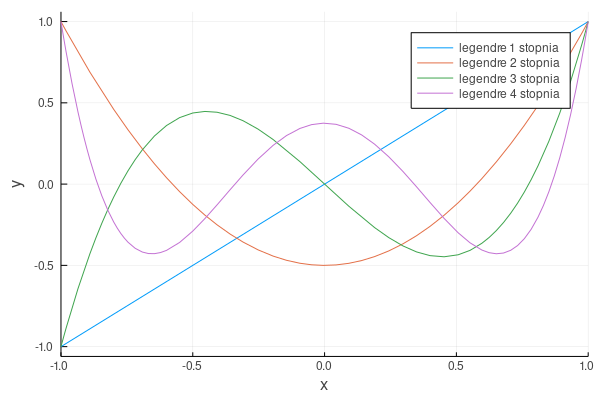

In [44]:
s=1
function lp(x)
    return legendre(s,x)
end
plot(lp, label="legendre 1 stopnia", xlims=(-1, 1),xlabel="x",ylabel="y",fmt=:png)
s+=1
plot!(lp, label="legendre 2 stopnia")
s+=1
plot!(lp, label="legendre 3 stopnia")
s+=1
plot!(lp, label="legendre 4 stopnia")


Sprawdź, że ich zera sa odciętymi punktów Gaussa.

In [39]:
#using Pkg
#Pkg.add("Roots")
using Roots
s=2
function lp(x)
    return legendre(s,x)
end

(x, a) = gauss(Float64,s);
println("Stopien: ",s)
println(x)
println(find_zeros(lp,  -1 ,1))

s+=1
(x, a) = gauss(Float64,s);
println("Stopien: ",s)
println(x)
println(find_zeros(lp,  -1 ,1))

s+=1
(x, a) = gauss(Float64,s);
println("Stopien: ",s)
println(x)
println(find_zeros(lp,  -1 ,1))

Stopien: 2
[-0.5773502691896258, 0.5773502691896258]
[-0.5773502691896257, 0.5773502691896257]
Stopien: 3
[-0.7745966692414834, 0.0, 0.7745966692414834]
[-0.7745966692414833, 0.0, 0.7745966692414833]
Stopien: 4
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
[-0.8611363115940526, -0.33998104358485626, 0.33998104358485626, 0.8611363115940526]


Wartosci obu tablic dla stopnia 2,3,4 sa zblizone do siebie. Stąd wynika, że zera tych funkcji są odcietymi punktow Gauss'a.

Pokazmy to jeszcze na wykresie:

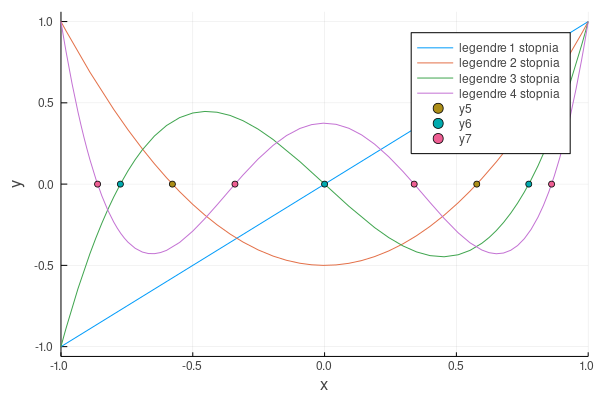

In [45]:
for s in [2,3,4]
    (x, a) = gauss(Float64,s);
    y = zeros(s)
    scatter!(x,y)
end
plot!()

O tej zależności mówi nam podstawowe twierdzenie kwadratur Gaussa, które głosi:
- Odcięte n-punktowej kwadratury Gaussa z funkcją wiążącą w(x) w [a,b] są zerami wielomianu ortagonalnego fi_n(x) dla tego samego przedziału i tej samej funkcji wiążącej.

### Zadanie 2

Napisz funkcję, która dla podanej liczby punktów Gaussa k oraz funkcji f policzy calke od -1 do 1

In [7]:
function calka(k,f)
    (xp, a) = gauss(k);
    return sum(a .* f.(xp))
end

f(x) = x
println(calka(3,f))

f(x) = x^4
println(calka(3,f))

f(x) = x^10
println(calka(3,f))

0.0
0.40000000000000013
0.08640000000000003


W rzeczywistosci calka dla 
- x^4 wynosi 0.4
- x^10 wynosi 0.181818...

Zgodnie z podstawowym twierdzeniem kwadratur Gaussa, można wywnioskować, że:
- Całka jest dokładna, gdy f(x) jest wielomianem stopnia <= n-1 (dla n-punktowej kwadratury) (bo f_n(_n)=0)

Jak widać na przykładzie dla n-punktowej kwadratury, dokładność sie zachowuje dla całki f(x)=x (stopien 1, 1<=2), a przestaje być dokładna dla f(x)=x^10 (stopien 10, 10<=2 )

### Zadanie 3

Rozszerz funkcje z zadania powyzej o niestandardowe przedziały:

In [67]:
function calka(k,f,a,b)
    F(z) =((b-a)/2) * f((b+a)/2+(b-a)/2*z)
    return calka(k,F)
end

f(x) = x
println(calka(1,f,0,1))

f(x) = x^2
println(calka(3,f,0,1))

f(x) = x^10
println(calka(10,f,0,1))

0.5
0.3333333333333333
0.09090909090909094


Wszystkie wyniki podanych przykladów sa bardzo zblizone do wynikow obliczonych analitycznie (kolejno 0.5 , 1/3 , 0.0909...)

### Zadanie 4

Funkcja guadgk używająca całkowania Gauss-Kronroda

In [70]:
f(x) = x
quadgk(f,0,1)

(0.5, 0.0)

Całkę od minus do plus nieskonczonosci standardowego rozkładu normalnego Gaussa:

In [68]:
f(x) = 1/sqrt(2*pi)*exp(-x^2/2)
quadgk(f,-Inf,Inf)

(1.0000000000032583, 1.4395584885993386e-8)